<a href="https://colab.research.google.com/github/khizerzakir/ERASMUS-CDE/blob/main/Lightning_reading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#### Import Python packages ####
import sys
import os
import glob
from netCDF4 import Dataset, num2date
import numpy as np
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER



In [3]:
!pip install netCDF4 cartopy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 76.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 38.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102745 sha256=535c3df8d88293058c5d39fe491e36a173e41ef53c30b9d96b1bda94bd95fcaa
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [18]:
#Initial file path. It can be changed by passing a different path as an argument
#to the main() function
file_path = '/content/Untitled Folder'


In [45]:

# Get a list of all files in the folder
file_list = os.listdir(file_path)

# Filter the list to only include NetCDF files
nc_list = [f for f in file_list if f.endswith(".nc")]

# Loop through the NetCDF files
for file_name in nc_list:
    # Open the NetCDF file
    with Dataset(os.path.join(file_path, file_name)) as nc_file:
        # Print the file name
        print("File:", file_name)
        # Print the list of variables
        print("Variables:", nc_file.variables.keys())
        # Print the global attributes
        print("Global attributes:", nc_file.__dict__)
        # Loop through the variables
        for var_name, var in nc_file.variables.items():
            # Print the variable attributes
            print(f"Variable: {var_name}, attributes: {var.__dict__}")

File: ISS_LIS_SC_V2.2_20230420_020223_NQC.nc
Variables: dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 

In [46]:
# Initialize empty lists to store start and end times
orbit_start = []
orbit_end = []

# Loop through the NetCDF files
for file_name in nc_list:
    # Open the NetCDF file
    with Dataset(os.path.join(file_path, file_name)) as nc_file:
      start_value_units = nc_file.variables['orbit_summary_TAI93_start']
      end_value_units = nc_file.variables['orbit_summary_TAI93_end']
      orbit_start.append(start_value)
      orbit_end.append(end_value)
print(start_value_units)


RuntimeError: ignored

In [44]:
print(start_value_units)

RuntimeError: ignored

In [47]:
#From the start and end times, calculate the minimum and maximum date of the files
start_dates = num2date(orbit_start[:])
stop_dates = num2date(orbit_end[:])



TypeError: ignored

ISS_LIS_SC_V2.2_20230420_020223_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

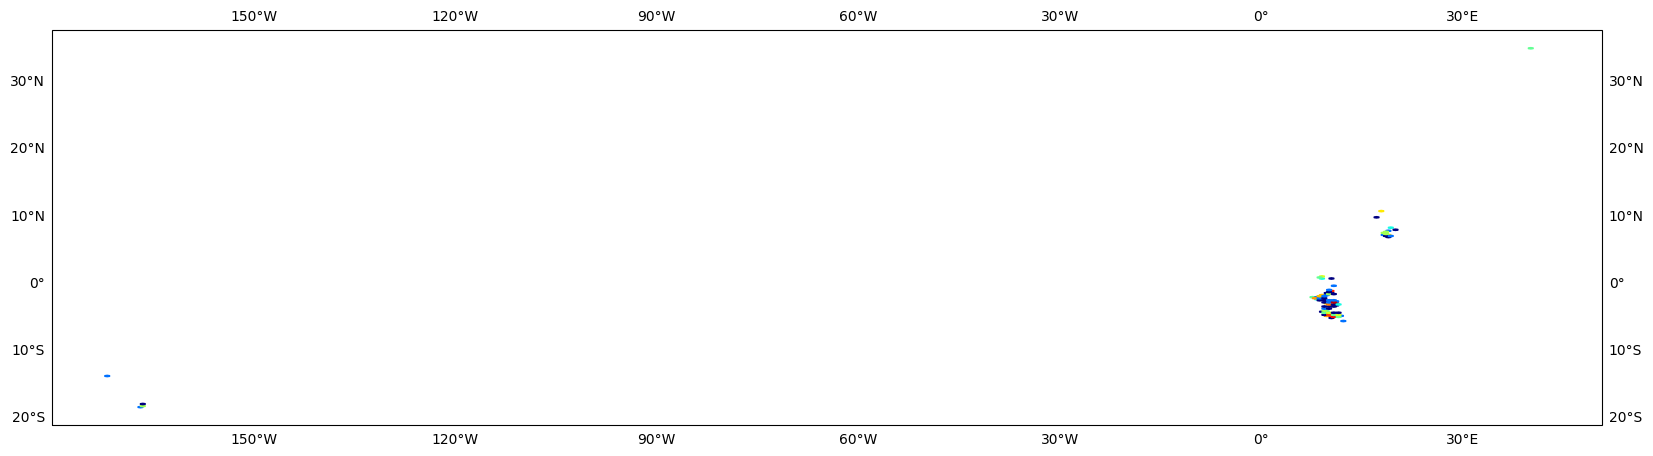

ISS_LIS_SC_V2.2_20230420_002933_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

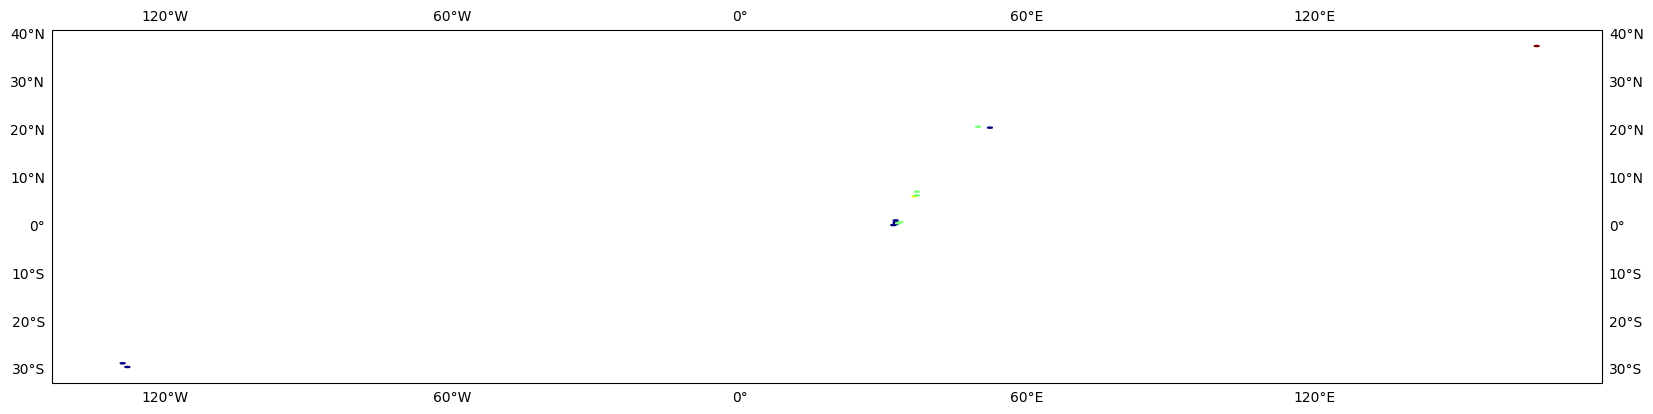

ISS_LIS_SC_V2.2_20230420_033514_NQC.nc
dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'bg_summary_TAI93_time', 'bg_summary_addre

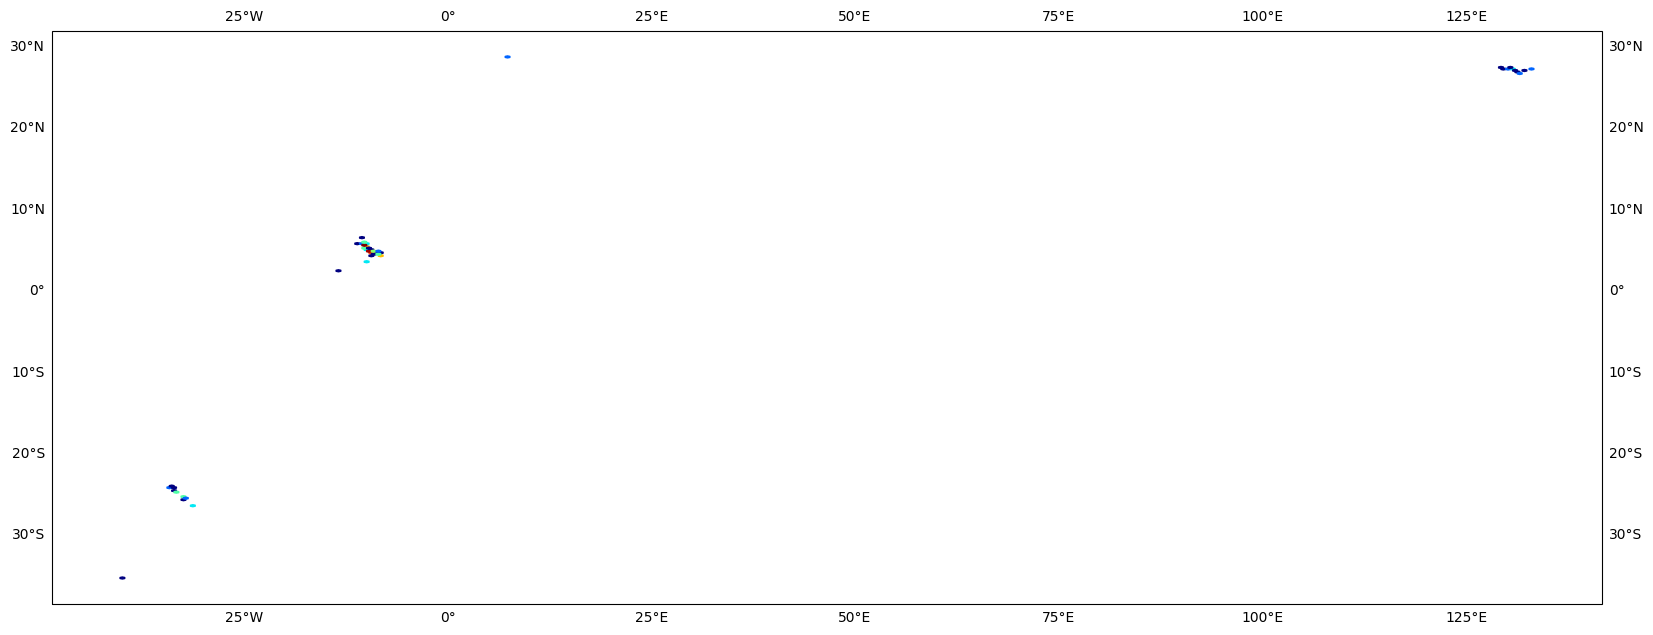

In [53]:


# Open the netCDF file
folder_path = '/content/Untitled Folder'

# Loop through each file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.nc'):
        # Open the netCDF file
        dataset = Dataset(os.path.join(folder_path, file_name))
        
        # Print the variable names
        print(file_name)
        print(dataset.variables.keys())
        
        # Get the latitude and longitude arrays
        lat = dataset.variables['lightning_flash_lat'][:]
        lon = dataset.variables['lightning_flash_lon'][:]
        
        # Create plot of lightning flash location heat map
        plt.figure(figsize=((20,20))) #Set plot dimensions
        map = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0))
        gl = map.gridlines(crs=ccrs.PlateCarree(central_longitude=0.0), draw_labels=True, linewidth=0.8, alpha=0.5, color='white', linestyle='--')
        lightning = map.hexbin(lon, lat, gridsize=300, bins='log',cmap='jet', mincnt=1 ,zorder=10) #Bin flash counts into hexbins using a gridsize of your choice
        
        # Show the plot
        plt.show()
# Get the lightning flash data
#lightning_flash_data = dataset.variables['flash_data'][:]

# Close the netCDF file
#dataset.close()
